In [2]:
# Installing the package to open my tif file

In [3]:
pip install rasterio

  Using cached rasterio-1.3.9-cp310-cp310-manylinux2014_x86_64.whl (20.6 MB)
  Using cached affine-2.4.0-py3-none-any.whl (15 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Installing the package to convert my utm coordinates to lat/lon

In [5]:
pip install utm

  Using cached utm-0.7.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importing packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import rasterio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import utm

In [7]:
# Opening Bathymetry File
filepath_asc = 'bathy_asc_lake_crescent.asc'

# Converted to a Numpy Array
dn_asc = np.genfromtxt(filepath_asc, skip_header = 6, dtype = float, delimiter = ' ')

In [8]:
# Seeing what the Numpy array looks like without recreating it
print(len(dn_asc))
display(dn_asc)

1758


array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]])

In [9]:
# Opening acoustic backscatter file
## Using https://stackoverflow.com/questions/44534009/plotting-with-rasterio
filepath_tif = 'back_tif_lake_crescent.tif'
img = rasterio.open(filepath_tif)

/opt/conda/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [10]:
# Setting up NumPy Array
x = np.arange(431687, 444833, 3)
y = np.arange(5321907, 5327181, 3)
## Checking to make sure it's a Numpy array and the dimensions are right
print(x)
print('x:', len(x))
print('y:', len(y))

[431687 431690 431693 ... 444824 444827 444830]
x: 4382
y: 1758


In [11]:
# Converting Numpy Array to xr
data_xr = xr.DataArray(data = dn_asc, dims = ['y', 'x'], coords = {'x':x, 'y':y})
# Taking out -9999 variables (invalid data)
data_xr = data_xr.where(data_xr != -9999)
display(data_xr)

<xarray.DataArray (y: 1758, x: 4382)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * x        (x) int64 431687 431690 431693 431696 ... 444824 444827 444830
  * y        (y) int64 5321907 5321910 5321913 ... 5327172 5327175 5327178

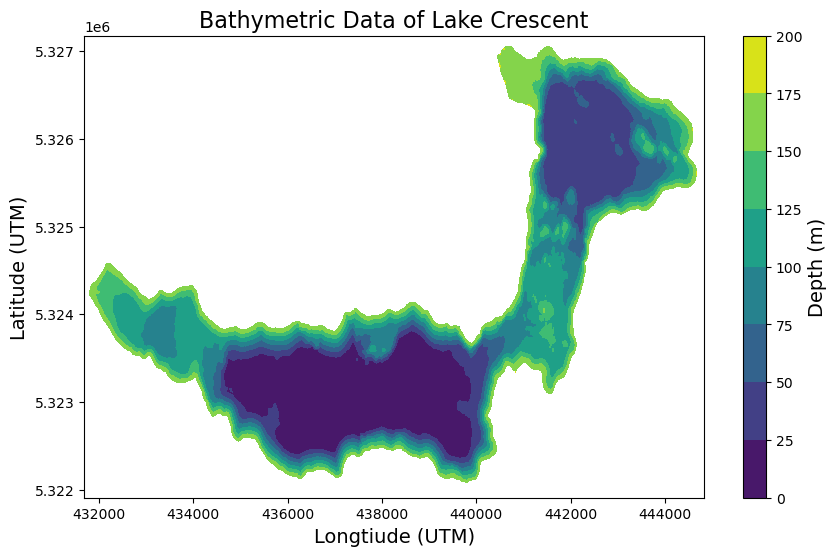

In [14]:
# Defined bathymetry Graph
## Kathy's Feedback - bathymetry for contour and color for acoustic backscatter
fig, ax = plt.subplots(figsize = (10,6))
ax = plt.gca()

cntr = plt.contourf(x, y, np.flip(data_xr, axis = 0), cmap = 'viridis') 
colorbar = plt.colorbar()
## Adding labels
colorbar.set_label('Depth (m)', fontsize = 14)
plt.xlabel('Longtiude (UTM)', fontsize = 14)
plt.ylabel('Latitude (UTM)', fontsize = 14)
plt.title('Bathymetric Data of Lake Crescent', fontsize = 16)

## Dowloading the graph
### Using https://futurestud.io/tutorials/matplotlib-save-plots-as-file
plt.savefig('bathymetry_data_undefined')

/tmp/ipykernel_65/3598633502.py:14: UserWarning: The following kwargs were not used by contour: 'linewith'
  cntr_lines = plt.contour(x, y, np.flip(data_xr, axis = 0), colors = 'black', levels = 5, linewith = 1)


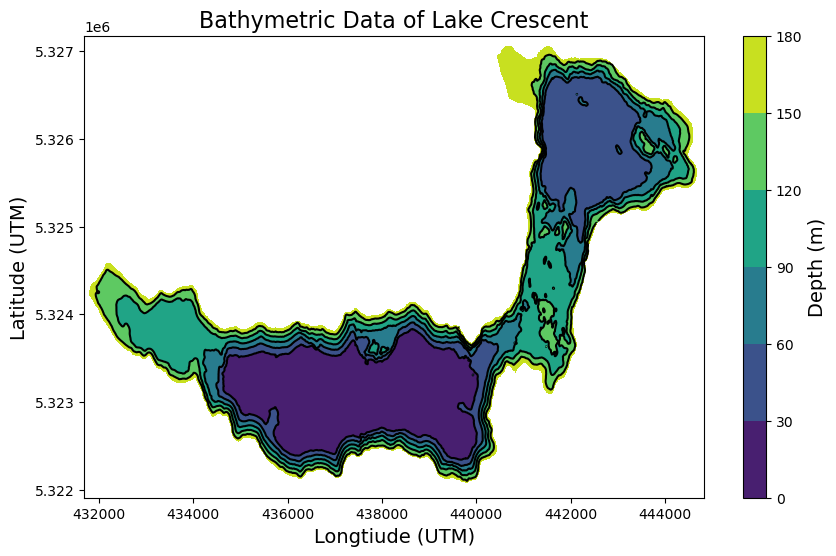

In [15]:
# Defined bathymetry Graph
## Kathy's Feedback - bathymetry for contour and color for acoustic backscatter
fig, ax = plt.subplots(figsize = (10,6))
ax = plt.gca()

cntr = plt.contourf(x, y, np.flip(data_xr, axis = 0), cmap = 'viridis', levels = 5) 
colorbar = plt.colorbar()
## Adding labels
colorbar.set_label('Depth (m)', fontsize = 14)
plt.xlabel('Longtiude (UTM)', fontsize = 14)
plt.ylabel('Latitude (UTM)', fontsize = 14)
plt.title('Bathymetric Data of Lake Crescent', fontsize = 16)
## Adding contour lines for definition
cntr_lines = plt.contour(x, y, np.flip(data_xr, axis = 0), colors = 'black', levels = 5, linewith = 1)

## Dowloading the graph
plt.savefig('bathymetry_data')

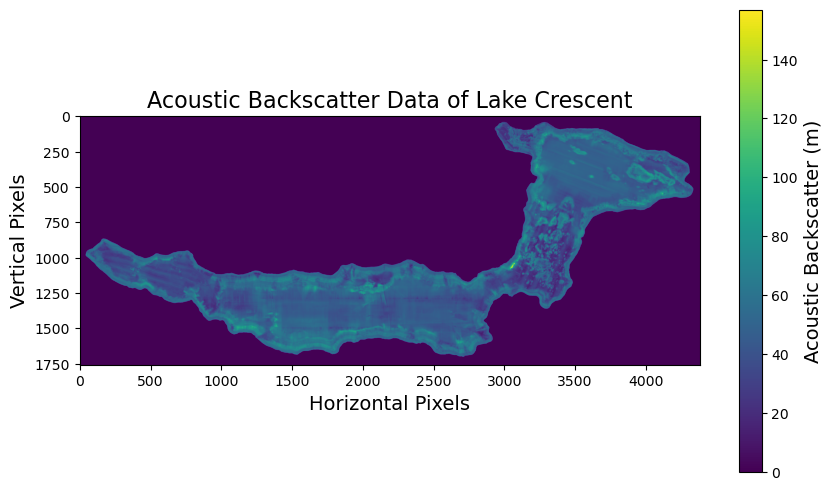

In [31]:
# Acoustic Backscatter Plot
fig,ax = plt.subplots(figsize = (10,6))
ax = plt.gca()

plt.imshow(img.read(1), cmap = 'viridis')
colorbar = plt.colorbar()
## Adding in features
colorbar.set_label('Acoustic Backscatter (m)', fontsize = 14)
plt.xlabel('Horizontal Pixels', fontsize = 14)
plt.ylabel('Vertical Pixels', fontsize = 14)
plt.title('Acoustic Backscatter Data of Lake Crescent', fontsize = 16)

## Downloading the Graph
plt.savefig('backscatter_data')

/tmp/ipykernel_102/4078074090.py:12: UserWarning: The following kwargs were not used by contour: 'linewith'
  cntr_lines = plt.contour(x, y, np.flip(data_xr, axis = 0), colors = 'white', levels = 3, linewith = 1)


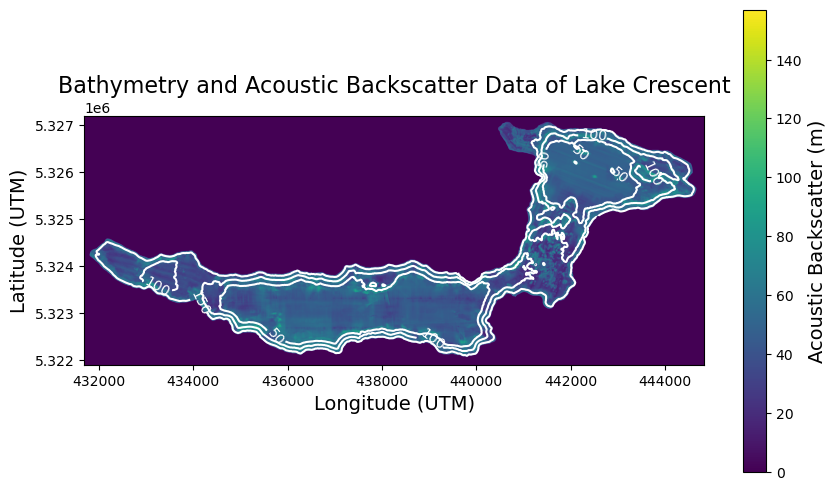

In [42]:
# Combining Graphs
fig, ax = plt.subplots(figsize = (10,6))
ax = plt.gca()

## Acoustic backscatter data
extent = x.min(), x.max(), y.min(), y.max()
plt.imshow(img.read(1), cmap = 'viridis', extent = extent)
colorbar = plt.colorbar()
## Adding features
colorbar.set_label('Acoustic Backscatter (m)', fontsize = 14)
plt.xlabel('Longitude (UTM)', fontsize = 14)
plt.ylabel('Latitude (UTM)', fontsize = 14)
plt.title('Bathymetry and Acoustic Backscatter Data of Lake Crescent', fontsize = 16)
## Bathymetry data
cntr_lines = plt.contour(x, y, np.flip(data_xr, axis = 0), colors = 'white', levels = 3, linewith = 1)
plt.clabel(cntr_lines)

plt.savefig('back_and_bath_graph')